# 変数変換と確率密度関数
## １変数の場合

確率変数$ X $とその確率密度関数$ f(x) $が与えられたとき、新たな確率変数$ Y = g(X) $を定義します。このとき、新しい確率変数$ Y $の確率密度関数$ h(y) $を求めます。具体的には、新しい確率変数$ Y $がある範囲$[y, y + \Delta y]$に落ちる確率を求め、その確率が$\Delta y$に対してどのようにスケールするかを調べます。

$$ Y = g(X) $$
より、
$$ X = g^{-1}(Y) $$

となります。ここで$g^{-1}(Y)$は逆関数で、ある関数 $ g(x) $ が $ x $ を $ y $ に変換するなら、その逆関数 $ g^{-1}(y) $ は $ y $ を元の $ x $ に戻します。この変数変換では、$ X $が$[x, x + \Delta x]$の範囲にある確率と$ Y $が$[y, y + \Delta y]$の範囲にある確率が一致します。すなわち、

$$ f(x) \Delta x = h(y) \Delta y $$

です。この式を整理すると、

$$ h(y) = \frac{f(x)}{\left| \frac{dy}{dx} \right|} = \frac{f(x)}{|g'(x)|} $$

となります。ただし、$ g'(x) = \frac{dy}{dx} $は$ g(x) $の導関数です。

最後に、この式の$ x $を$ g^{-1}(y) $によって$ y $に変換することで、

$$ h(y) = \frac{f(g^{-1}(y))}{|g'(g^{-1}(y))|} $$

が得られます。これが、$ Y = g(X) $によって変換された新しい確率変数$ Y $の確率密度関数$ h(y) $です。

この変換が成り立つためにはここで$ g(x) $が単調関数で、微分可能である必要があります。

### 例１：単調関数

**確率変数 $X$ は平均0、標準偏差1の正規分布に従うとします。
$$Y=2X+3$$
と変数変換します。$X$の範囲を-4から4までと指定し、変数変換をグラフで表現してみましょう。**

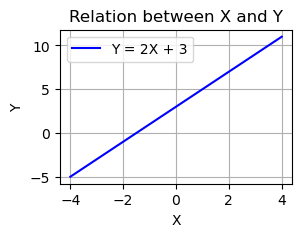

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-4, 4, 1000)# 元の確率変数 X に関する設定
y = 2 * x + 3# 変数変換
plt.figure(figsize=(3,2))
plt.plot(x, y, label="Y = 2X + 3", color='blue')
plt.title("Relation between X and Y")
plt.xlabel("X");plt.ylabel("Y");plt.legend();plt.grid(True)
plt.show()

その確率密度関数を$f(x)$とします。このとき、$Y$ の確率密度関数は、先ほどの数式に基づいて次のように計算できます：

$f(x)=\frac{1}{\sqrt{2\pi}}(-x^2/2)$とすると  
$Y=g(X)=2X+3$  
$Y=y$となるケースは  
$X=g^{-1}(y)=\frac{y-3}{2}$    
$Y$の確率密度関数を$h(y)$とすると  
$f(x)dx=h(y)dy$  

$$
h(y) = f(x)\frac{dx}{dy}=\frac{f(x)}{|\frac{dy}{dx}|}=\frac{f[g^{-1}(y)]}{|g'(g^{-1}(y))|} = \frac{f[(y - 3)/2]}{|g'(g^{-1}(y))|}$$
$$= \frac{\frac{1}{\sqrt{2\pi}}\exp\{-\frac{1}{2}[(y - 3)/2]^2\}}{|2|} = \frac{1}{2} \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{[(y - 3)/2]^2}{2}\right)
$$

元の確率変数 $X$ と変換された確率変数 $Y$ の確率密度関数を描画します。$Y$ の確率密度関数は数学的に導出した結果を基に計算しています。

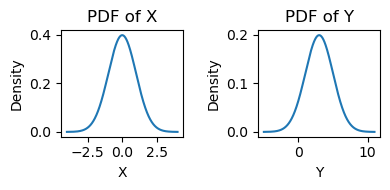

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# X,Y の確率密度関数
pdf_x = norm.pdf(x, 0, 1)
pdf_y = (1 / np.abs(2)) * norm.pdf((y - 3) / 2, 0, 1)

# グラフ描画
plt.figure(figsize=(4, 2))

plt.subplot(1, 2, 1)
plt.title('PDF of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.plot(x, pdf_x)

plt.subplot(1, 2, 2)
plt.title('PDF of Y')
plt.xlabel('Y')
plt.ylabel('Density')
plt.plot(y, pdf_y)

plt.tight_layout()
plt.show()

関数 $ f(x) = 2x + 3 $ は、入力 $ x $ を 2 倍して 3 を足す操作を行います。逆関数 $ f^{-1}(y) $ は、この操作を逆に行い、$ y $ を $ x $ に戻します。

逆関数 $ f^{-1}(y) $ を求める手順は具体的に：

$$ f(x) = y $$
$$ 2x + 3 = y $$
$$ 2x = y - 3 $$
$$ x = \frac{y - 3}{2} $$

この最後の式 $ x = \frac{y - 3}{2} $ が逆関数 $ f^{-1}(y) $ です。

### 例２: 非単調関数と一様分布

**一様分布 $ U(-1, 1) $ から生成された確率変数 $ X $ を考え、$ Y = X^2 $ という変数変換を適用します。**

この場合、元の確率密度関数 $ f(x) $ は $ \frac{1}{2} $ で、  
$ Y =g(X)= X^2 $ により  
$Y=y$となる場合は、
$ X =g^{-1}(y)= \pm \sqrt{Y} $    
$ g'(X) = 2X $ です。  

新しい確率変数 $ Y $ の確率密度関数 $ h(y) $ は、

$$
h(y) = \frac{f(x)}{|g'(x)|}= \frac{f(g^{-1}(y))}{|g'(g^{-1}(y))|}=\frac{1}{2|2\sqrt{y}|} + \frac{1}{2|2\sqrt{y}|} = \frac{1}{2\sqrt{y}}
$$

となります（$ y $ が 0 以上 1 以下の場合）。

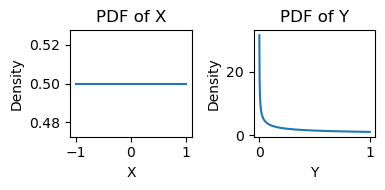

In [3]:
# 元の確率変数 X に関する設定
x = np.linspace(-1, 1, 1000)
pdf_x = np.full_like(x, 0.5)

# 変数変換 Y = X^2
y = np.linspace(0.001, 1, 1000)  # y=0 で h(y) が発散するため、0.001 からスタート
pdf_y = 1 / np.sqrt(y)  # 2 * (1/|2 * sqrt(y)|)

# グラフ描画
plt.figure(figsize=(4, 2))

plt.subplot(1, 2, 1)
plt.title('PDF of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.plot(x, pdf_x)

plt.subplot(1, 2, 2)
plt.title('PDF of Y')
plt.xlabel('Y')
plt.ylabel('Density')
plt.plot(y, pdf_y)

plt.tight_layout()
plt.show()

### 例３：非単調関数と正規分布

**確率変数 $X$ が標準正規分布にしたがうとします。その確率密度関数を$f(x)$とします。$ Y = X^2 $ という変数変換を適用し、確率密度関数を求めます。**

確率変数 $X$の確率密度関数$f(x)=\frac{1}{\sqrt{2\pi}}\exp(-x^2/2)$  
変数変換を$Y=g(X)=X^2$  
$Y=y$となる場合に、  
$X=g^{-1}(y)=\pm \sqrt{y}$  
$X>0$のみを考え、確率密度関数を2倍します。  
$g'(x)=2x$  

変数 $ Y $ の確率密度関数 $ h(y) $ は以下のようになります：

$$
h(y) = \frac{2f(x)}{|g'(x)|}=\frac{2f(g^{-1}(y))}{|g'(g^{-1}(y))|}
$$
$$
h(y)=\frac{\frac{2}{\sqrt{2\pi}}\exp(-x^2/2)}{|2x|}=\frac{1}{\sqrt{2\pi y}}\exp(-y/2)
$$

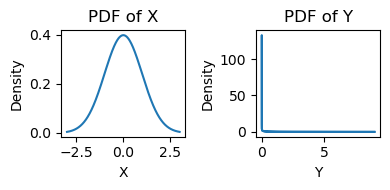

In [4]:
# 元の確率変数 X に関する設定
x = np.linspace(-3, 3, 1000)
pdf_x = norm.pdf(x, 0, 1)

y = x ** 2# 変数変換

# Y の確率密度関数
# 注意: X = ±√Y なので、確率密度は2つの項で表される
J=(1 / np.abs(2 * np.sqrt(y)))
pdf_y_positive = J * norm.pdf(np.sqrt(y), 0, 1)
pdf_y_negative = J * norm.pdf(-np.sqrt(y), 0, 1)
pdf_y = pdf_y_positive + pdf_y_negative

# グラフ描画
plt.figure(figsize=(4, 2))

plt.subplot(1, 2, 1)
plt.title('PDF of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.plot(x, pdf_x)

plt.subplot(1, 2, 2)
plt.title('PDF of Y')
plt.xlabel('Y')
plt.ylabel('Density')
plt.plot(y, pdf_y)

plt.tight_layout()
plt.show()


関数が全体で単調増加または単調減少であれば、その逆関数を求めるのは簡単です。$f(x)=x^2$のような単調関数ではない場合には領域を分割します。他の例として、三角関数のような周期関数が挙げられます。

例：$ f(x) = \sin(x) $

この関数は、全体で見ると単調増加でも単調減少でもありません。しかし、$ x $ の領域を適当に分割することで、その範囲内で単調増加または単調減少になる部分が見つかります。

### 例４： 対数正規分布の期待値と分散

**確率変数$ X $が正規分布（平均$\mu$、分散$\sigma^2$）に従い、確率変数$Y$を$ Y = \exp(X) $とする。$ Y $の確率密度関数、期待値、分散を変数変換を用いて求めよ**

$ X $の確率密度関数は

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]
$$

$ Y =g(X)= \exp(X) $より、   
$Y=y$となる場合に  
$ X = g^{-1}(y)=\ln(y) $となります。  

$f(x)dx=h(y)dy$より  

$$
h(y) = f(x)\frac{dx}{dy}=f(g^{-1}(y)) \left| \frac{d}{dy} g^{-1}(y) \right|
$$

この式に従い、

$$
h(y) = \frac{1}{\sqrt{2\pi\sigma^2}y} \exp\left(-\frac{(\ln(y)-\mu)^2}{2\sigma^2}\right)
$$

これが$ Y $の確率密度関数です。次に、$ Y $の期待値と分散を求めます。


**期待値**

$$
E[Y] = \int_0^\infty y \cdot h(y) \, dy
$$

を求めます。この式を展開すると

$$
E[Y] = \int_0^\infty y \frac{1}{\sqrt{2\pi} \sigma y} \exp\left( -\frac{(\ln(y) - \mu)^2}{2\sigma^2} \right) \, dy
$$
$$
= \frac{1}{\sqrt{2\pi} \sigma} \int_0^\infty \exp\left( -\frac{(\ln(y) - \mu)^2}{2\sigma^2} \right) \, dy
$$

となります。まず、$ z = \frac{\ln(y) - \mu}{\sqrt{2} \sigma} $とおいて変数を変換します。それを$ y $について解くと、

$$
y = \exp(\sqrt{2}\sigma z + \mu)
$$

となります。この変数変換のヤコビアン（$ \frac{dy}{dz} $の絶対値）は以下のように計算できます。

$$
\left| \frac{dy}{dz} \right| = \left| \sqrt{2} \sigma \exp(\sqrt{2} \sigma z + \mu) \right| = \sqrt{2} \sigma y
$$

これを用いて、元の確率密度関数に変数変換を適用すると、

$$
E[Y] = \int_0^\infty y \frac{1}{\sqrt{2\pi} \sigma y} \exp\left( -\frac{(\ln(y) - \mu)^2}{2\sigma^2} \right) \, dy
$$
$$
= \frac{1}{\sqrt{2\pi} \sigma} \int_{-\infty}^\infty \exp(-z^2) \sqrt{2} \sigma \exp(\sqrt{2} \sigma z + \mu) \, dz
$$
$$
= \frac{1}{\sqrt{\pi}} \int_{-\infty}^\infty \exp(-z^2 + \sqrt{2} \sigma z + \mu) \, dz
$$
$$
= e^\mu \frac{1}{\sqrt{\pi}} \int_{-\infty}^\infty \exp(-z^2 + \sqrt{2} \sigma z) \, dz
$$

次に、積分項の中の$-z^2 + \sqrt{2} \sigma z$を完全平方の形に整理します。これは、

$$
-z^2 + \sqrt{2} \sigma z = -\left(z - \frac{\sigma}{\sqrt{2}}\right)^2 + \frac{\sigma^2}{2}
$$

と書くことができます。この完全平方を使って積分式を書き直すと、

$$
E[Y] = \frac{e^\mu}{\sqrt{\pi}} e^{\frac{\sigma^2}{2}} \int_{-\infty}^\infty \exp\left(-\left(z - \frac{\sigma}{\sqrt{2}}\right)^2\right) \, dz
$$

となります。この積分は、平均が$\frac{\sigma}{\sqrt{2}}$、標準偏差が1の正規分布の確率密度関数に関する積分です。よってこの積分は1であることが知られています。最終的に、

$$
E[Y] = e^\mu e^{\frac{\sigma^2}{2}} = \exp\left[\mu + \frac{\sigma^2}{2}\right]
$$

が得られます。

**分散**

$$Var[Y]=\int_{-\infty}^\infty y^2\cdot h(y) dy$$

この場合、$ E[Y^2] $を計算するために

$$
E[Y^2] = \int_0^\infty y^2 \frac{1}{\sqrt{2\pi} \sigma y} \exp\left( -\frac{(\ln(y) - \mu)^2}{2\sigma^2} \right) \, dy
$$

という積分を求めます。

ここで、$ \ln(y) - \mu = x $と変数変換します。このとき、$ y = \exp(x + \mu) $、$ dy = \exp(x + \mu) \, dx $です。

変数変換後の積分式は

$$
E[Y^2] = \int_{-\infty}^\infty \exp((x + \mu)) \frac{1}{\sqrt{2\pi} \sigma } \exp\left( -\frac{x^2}{2\sigma^2} \right) \exp(x + \mu) \, dx
$$

となります。この式を整理すると、

$$
E[Y^2] = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi} \sigma} \exp\left( 2\mu + 2x - \frac{x^2}{2\sigma^2} \right) \, dx
$$

こちらの積分はガウス積分になりますので、

$$
E[Y^2] = \exp(2\mu + 2\sigma^2)
$$

と解けます。

この$ E[Y^2] $と先ほど求めた$ E[Y] $を用いて、対数正規分布の分散$ \text{Var}(Y) $を計算できます。

$$
\text{Var}(Y) = E[Y^2] - (E[Y])^2 = \exp(2\mu + 2\sigma^2) - [\exp(\mu + \sigma^2/2)]^2
$$
$$
= \exp(2\mu + \sigma^2+\sigma^2) - \exp(2\mu + \sigma^2)
$$
$$
= \exp(2\mu + \sigma^2)\exp(\sigma^2) - \exp(2\mu + \sigma^2)
$$
$$
= \exp(2\mu + \sigma^2)[\exp(\sigma^2) - 1]
$$

このようにして、対数正規分布の分散を求めることができます。

#### モーメント母関数による導出

ワークブックのp.24には変数変換の例題であるにもかかわらず、モーメント母関数を用いて解を得ています。

**期待値**

モーメント母関数は$M(s)=E[\exp(sX)]$です。$s=1$とすると$M(1)=E[\exp(X)]$となり、正規分布のモーメント母関数を知っていれば対数正規分布の期待値が得られます。

$M(s)=E[\exp(sX)]=\int_{-\infty}^\infty \exp(sx)\frac{1}{\sqrt{2\pi}}\exp \left[-\frac{(x-\mu)^2}{2\sigma^2}\right]dx$

$=\int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}}\exp \left[-\frac{(x-\mu)^2}{2\sigma^2}-sx\right]dx$

$=\int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}}\exp \left[-\frac{[x-(\mu+s\sigma^2)]^2}{2\sigma^2}+\frac{(\mu+s\sigma^2)^2-\mu^2}{2\sigma^2}\right]dx$

$=\int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}}\exp \left[-\frac{[x-(\mu+s\sigma^2)]^2}{2\sigma^2}\right]dx\exp\left[\frac{(\mu+s\sigma^2)^2-\mu^2}{2\sigma^2}\right]$

$=\exp\left[\frac{(\mu+s\sigma^2)^2-\mu^2}{2\sigma^2}\right]=\exp\left[\mu s+s^2\sigma^2/2\right]$

よって、$M(1)=E[\exp(X)]=\exp(\mu+\sigma^2/2)$

**分散**

つぎに$V[\exp(X)]=E[\exp(X)^2]-E[\exp(X)]^2$より

$E[\exp(X)^2]=E[\exp(2X)]$が必要なことが分かります。これは$M(2)=E[\exp(2X)]=\exp\left[2\mu+2\sigma^2\right]$から得られます。

よって、

$V[\exp(X)]=E[\exp(X)^2]-E[\exp(X)]^2=\exp\left[2\mu+2\sigma^2\right]-[\exp(\mu+\sigma^2/2)]^2$

$=\exp(2\mu+\sigma^2)\exp(\sigma^2)-\exp(2\mu+\sigma^2)=\exp(2\mu+\sigma^2)[\exp(\sigma^2)-1]$


## ２変数の場合

確率密度関数$ f(x, y) $から新たな確率変数$(Z, W)$を変数変換$(Z, W) = (u(X, Y), v(X, Y))$または  
$Z=u(X,Y)$  
$W=v(X,Y)$  

によって求めます。この同時確率密度関数を求めます。

確率変数$ (X, Y) $が確率密度関数 $ f(x, y) $ に従い、新しい確率変数 $ (Z, W) = (u(X, Y), v(X, Y)) $ を導入する場合、この変数変換が確率分布にどのように影響するかを考えます。

まず、$ (X, Y) $ がある領域 $ A $ に落ちる確率 $ P $ は以下のように定義されます：

$$
P(A) = \int_{A} f(x, y) dx dy
$$

この確率 $ P(A) $ は、変数変換によって $ (Z, W) $ が領域 $ B $ に落ちる確率と等しくなければなりません。すなわち、

$$
P(A) = P(B)
$$

変数変換 $ (u, v) $ によって、$ A $ の各点 $ (x, y) $ は $ B $ の各点 $ (z, w) $ に移ります。局所的に $ dx dy $ の面積要素は $ du dv $ に変わりますが、この変化の度合いは場所によって異なる可能性があります。この局所的な"面積の歪み"を捉えるのがヤコビアン $ J $ です。したがって、新しい確率変数 $ (Z, W) $ の同時確率密度関数 $ g(z, w) $ は以下のように表せます：

$$
g(z, w) du dv = f(x, y) dx dy
$$

これを変形すると、

$$
g(z, w) = f(x, y) \left| \frac{dx dy}{du dv} \right|
$$

新しい確率変数 $ (Z, W) $ の同時確率密度関数 $ g(z, w) $ は、以下のように表されます：

$$
g(z, w) = \frac{f(x, y)}{| J |}
$$

この $ \left| \frac{dx dy}{du dv} \right| $ がヤコビアンの逆 $ 1/|J| $ です。

一般にヤコビアン $ J $ と呼ばれる行列式は

$$
J = \left| \frac{\partial(u, v)}{\partial(x, y)} \right| = \left| \begin{array}{cc}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{array} \right|
$$

よって、

$$
g(z, w) = f(x, y) \cdot \frac{1}{|J|}
$$

このようにしてヤコビアンが導入され、新しい確率密度関数 $ g(z, w) $ が $ f(x, y) $ と"整合的"になります。ただし、$ x = u^{-1}(z, w) $ および $ y = v^{-1}(z, w) $ です。これは多変数の場合の確率密度関数の変数変換における一般的な公式です。


### 例５：変数の和の確率密度関数

**確率変数$X$, $Y$が独立でそれぞれパラメータ$\lambda$の指数分布にしたがうとき、$X＋Y$の確率密度関数を求めよ**

まず、一般化した解を得ます。

$Z=aX+bY$, $W=Y$とします。この場合、

$Z=u(X,Y)=aX+bY$, 

$W=v(X,Y)=Y$となります。このときの逆関数は

$X=\frac{Z-bY}{a}=\frac{Z-wY}{a}$と$Y=W$です。ヤコビアンは

$$
J = \left| \frac{\partial(u, v)}{\partial(x, y)} \right| = \left| \begin{array}{cc}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{array} \right|
=  \left| \begin{array}{cc}
\frac{\partial Z}{\partial X} & \frac{\partial Z}{\partial Y} \\
\frac{\partial W}{\partial X} & \frac{\partial W}{\partial Y}
\end{array} \right|
=  \left| \begin{array}{cc}
a & b \\
0 & 1
\end{array} \right|=a
$$

$(Z,W)$の確率密度関数は

$f_X\left(\frac{z-bw}{a}\right)\frac{f_Y(w)}{|a|}$

となります。$w$について積分すると$Z$の確率密度関数は

$$f_Z(z)=\int_{-\infty}^\infty \frac{1}{|a|}f_X\left(\frac{z-bw}{a}\right)f_Y(w)dw$$

となります。

これらを問題に当てはめると$a=1, b=1$となり、$[0, z]$の範囲で$X$と$Y$の値を積分します。$Z=z$となるためには、$X$と$Y$の値が合計して$z$になるような組み合わせが存在する必要があります。それがどのような組み合わせであるかを考え、それに基づいて積分を行います。
$X$と$Y$が共に非負（指数分布であるため）であることを考慮すると、$Z = X + Y$も非負です。したがって、積分は$0$から$z$までとなります。この理由は、$Z=z$となる$X$と$Y$の組み合わせは、$X=0, Y=z$から$X=z, Y=0$までの間に存在するためです。具体的には、$Z = X + Y = z$であれば、$0 \leq X \leq z$および$0 \leq Y \leq z$となり、$Y = z - X$です。したがって、積分は$X$が$0$から$z$まで、または同様に$Y$が$0$から$z$まで変化するときの値を全て足し合わせる、という形になります。

$$f_Z(z)=\int_{0}^z f_x(z-w)f_y(w)dw$$

$$
= \int_0^z \lambda e^{-\lambda (z-w)} \cdot \lambda e^{-\lambda w} \, dw
$$
$$
= \int_0^z \lambda^2 e^{-\lambda z} e^{\lambda w} e^{-\lambda w} \, dw
$$

$$
= \lambda^2 e^{-\lambda z} \int_0^z  dw
$$

$$
= \lambda^2 e^{-\lambda z} [w]_0^z
$$

$$
= \lambda^2 z e^{-\lambda z}
$$

**ガンマ分布の再生成の利用**

同じパラメータ $\lambda$ の指数分布に従う独立な確率変数 $X$ と $Y$ があり、それぞれの確率密度関数（pdf）が以下で与えられるとします。

$$
f_X(x; \lambda) = \lambda e^{-\lambda x} \quad (x > 0)
$$
$$
f_Y(y; \lambda) = \lambda e^{-\lambda y} \quad (y > 0)
$$

これらの和 $Z = X + Y$ の確率密度関数 $f_Z(z)$ を求めます。この特定の設定下で、和 $Z$ はガンマ分布の再生成（renewal）の性質により、パラメータ $(k=2, \theta=1/\lambda)$ のガンマ分布に従います。すなわち、

$$
f_Z(z; k=2, \theta=1/\lambda) = \frac{\lambda^2 z e^{-\lambda z}}{1!} \quad (z > 0)
$$

これにより、$Z = X + Y$ の確率密度関数が求まりました。


### 例６：変数の和の確率密度関数

**確率変数 $X$,$Y$が独立でそれぞれ正規分布$N(\mu_1,\sigma_1^2)$、$N(\mu_2,\sigma_2^2)$にしたがうとき、 $aX＋bY$の確率密度関数を求めよ。**

確率変数 $ Z = aX + bY $ の確率密度関数 $ f_Z(z) $ は次のように表現できます。

$$
f_Z(z) = \int_{-\infty}^\infty \frac{1}{|a|} f_X\left(\frac{z - bw}{a}\right) f_Y(w) \, dw
$$

各確率密度関数 $ f_X(x) $ と $ f_Y(y) $ が正規分布に従うとした場合、その式は

$$
f_X(x) = \frac{1}{\sqrt{2\pi} \sigma_1} \exp\left( -\frac{(x - \mu_1)^2}{2\sigma_1^2} \right)
$$
$$
f_Y(y) = \frac{1}{\sqrt{2\pi} \sigma_2} \exp\left( -\frac{(y - \mu_2)^2}{2\sigma_2^2} \right)
$$

となります。これを $ f_Z(z) $ の積分に代入して計算します。$ Z = aX + bY $ と定義されている場合、$ Y $ に掛かる係数 $ b $ は $ Z $ の分布に影響を与えますが、その影響は $ \mu_2 $ に直接現れるわけではありません。

$$
f_Z(z) = \int_{-\infty}^{\infty} \frac{1}{|a|} \frac{1}{\sqrt{2\pi \sigma_1^2}} \exp\left(-\frac{1}{2\sigma_1^2} \left(\frac{z - b w}{a} - \mu_1\right)^2\right) \frac{1}{\sqrt{2\pi \sigma_2^2}} \exp\left(-\frac{1}{2\sigma_2^2} (w - \mu_2)^2\right) dw--(2.1)
$$

確率変数 $ Z $ の期待値 $ E[Z] $ は $ E[aX + bY] = aE[X] + bE[Y] = a\mu_1 + b\mu_2 $ になります。この式において $ b $ は $ \mu_2 $ に掛かっています。しかし、それは $ Z $ の期待値を求める際の計算です。確率密度関数 $ f_Z(z) $ の積分表現では、この $ b $ は $ Y $ がどう $ Z $ に寄与するかを示しています。積分の中で $ f_X $ の引数が $ \frac{z - by}{a} $ となっているのはそのためです。この $ b $ は $ \mu_2 $ に直接掛かっているわけではなく、$ Y $ が $ Z $ にどのように影響を与えるかを制御しています。

$
-\frac{1}{2\sigma_1^2} \left(\frac{z - b w}{a} - \mu_1\right)^2 - \frac{1}{2\sigma_2^2} (w - \mu_2)^2$

$= \frac{1}{2a^2\sigma_1^2}\left(-(z - b w)^2 +2a\mu_1(z - b w) - a^2\mu_1^2\right) + \frac{1}{2\sigma_2^2}\left(-w^2 + 2\mu_2w -\mu_2^2\right)$

$= \frac{1}{2a^2\sigma_1^2}\left(-z^2 + 2bwz - b^2w^2+2a\mu_1 z - 2a\mu_1 b w - a^2\mu_1^2\right) + \frac{1}{2\sigma_2^2}\left(-w^2 + 2\mu_2 w- \mu_2^2\right)$

$= \frac{1}{2a^2\sigma_1^2\sigma_2^2}\left(-\sigma_2^2z^2 + 2b\sigma_2^2zw - b^2\sigma_2^2w^2+2a\mu_1\sigma_2^2 z - 2a\mu_1 b\sigma_2^2 w - a^2\sigma_2^2\mu_1^2 -a^2\sigma_1^2w^2 + 2\mu_2a^2\sigma_1^2 w- a^2\sigma_1^2\mu_2^2\right)$

まず、指数関数の中身が全体として二次形式になるように整理します。

$$
= \frac{-\sigma_2^2z^2 + 2a\mu_1\sigma_2^2 z - a^2\mu_1^2\sigma_2^2 - a^2\mu_2^2\sigma_1^2}{2a^2\sigma_2^2\sigma_1^2}+\frac{ - (b^2\sigma_2^2+ a^2\sigma_1^2)w^2 + 2(b\sigma_2^2z - a\mu_1 b \sigma_2^2  + a^2\sigma_1^2\mu_2 )w}{2a^2\sigma_2^2\sigma_1^2}
$$
ここで
$A=\frac{-\sigma_2^2z^2 + 2a\mu_1\sigma_2^2 z - a^2\mu_1^2\sigma_2^2 - a^2\mu_2^2\sigma_1^2}{2a^2\sigma_2^2\sigma_1^2}$ と$B=\frac{ - (b^2\sigma_2^2+ a^2\sigma_1^2)w^2 + 2(b\sigma_2^2z - a\mu_1 b \sigma_2^2  + a^2\sigma_1^2\mu_2 )w}{2a^2\sigma_2^2\sigma_1^2}$と$C=(a^2\sigma_1^2+b^2\sigma_2^2)$と置くと

Bの項を完全平方に整理するには、最初に $w^2$ の係数を使って、他の項も整理します。具体的には、この式を以下のように書き換えることができます：

$$B_0=
C[-w^2 + 2\frac{(b\sigma_2^2z - \mu_1a b \sigma_2^2  + a^2 \sigma_1^2\mu_2)}{C}w
$$
$$
=C\left[ - \left(w - \frac{b\sigma_2^2z - \mu_1 ab \sigma_2^2  + a^2\mu_2 \sigma_1^2}{C} \right)^2 + \left( \frac{b\sigma_2^2z - \mu_1 ab \sigma_2^2  + a^2\mu_2 \sigma_1^2}{C} \right)^2\right]
$$

となります。ここで$B_1= -\left( w - \frac{b\sigma_2^2z - \mu_1 ab \sigma_2^2  + a^2\mu_2 \sigma_1^2}{C} \right)^2$,そして$B_2=\left( \frac{b\sigma_2^2z - \mu_1 ab \sigma_2^2  + a^2\mu_2 \sigma_1^2}{C} \right)^2$とします。

式(2.1)を変形して

$$
f_Z(z) = \frac{1}{|a|}\frac{1}{\sqrt{2\pi \sigma_1^2}}\frac{1}{\sqrt{2\pi \sigma_2^2}}\int_{-\infty}^{\infty}   \exp\left(- \left(\frac{z - b w}{a} - \mu_1\right)^2\right)  \exp\left(-\frac{1}{2\sigma_2^2} (w - \mu_2)^2\right) dw
$$
$$
= \frac{1}{\sqrt{2\pi}}\exp(A)\frac{1}{\sqrt{2\pi a^2\sigma_1^2\sigma_2^2}}\int_{-\infty}^{\infty}   \exp(B) dw
$$
$$
= \frac{1}{\sqrt{2\pi C}}\exp(A)\frac{1}{\sqrt{2\pi a^2\sigma_1^2\sigma_2^2/C}}\int_{-\infty}^{\infty}   \exp\left[ \frac{C}{2a^2\sigma_2^2\sigma_1^2}(B_1+B_2)\right] dw
$$
$$
= \frac{1}{\sqrt{2\pi C}}\exp(A)\exp\left( \frac{C}{2a^2\sigma_2^2\sigma_1^2}B_2\right)
$$
$$
= \frac{1}{\sqrt{2\pi C}}\exp\left( \frac{(-\sigma_2^2z^2 + 2a\mu_1\sigma_2^2 z - a^2\mu_1^2\sigma_2^2 - a^2\mu_2^2\sigma_1^2)C+
(b\sigma_2^2z - \mu_1 ab \sigma_2^2  + a^2\mu_2 \sigma_1^2)^2}{2a^2\sigma_2^2\sigma_1^2C}\right)
$$